In [1]:
f = open("/tmp/a.txt", "w")

In [4]:
! pip install numpy

     |████████████████████████████████| 16.8 MB 2.3 MB/s eta 0:00:01


In [5]:
import numpy as np

In [6]:
p = np.array([2,3])

In [7]:
p

array([2, 3])

In [8]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1800.9375413899604
199 1208.353894020422
299 812.2699375808497
399 547.3601942098111
499 370.0662175285376
599 251.3286483274648
699 171.7505885338972
799 118.37747363831636
899 82.55225971670225
999 58.486194713184304
1099 42.30597722331807
1199 31.418196233374765
1299 24.085179059810116
1399 19.141769566268376
1499 15.806100845845425
1599 13.553090920669826
1699 12.029816815506813
1799 10.998865733150568
1899 10.300387788141371
1999 9.82665787912066
Result: y = 0.022148356881033726 + 0.8334988778952284 x + -0.0038209601122276412 x^2 + -0.0900244218867627 x^3


In [10]:
! pip install torch

     |████████████████████████████████| 881.9 MB 4.7 kB/s eta 0:00:01    |███▏                            | 86.3 MB 2.7 MB/s eta 0:05:00     |██████▉                         | 189.4 MB 2.5 MB/s eta 0:04:37     |████████████▎                   | 339.4 MB 2.6 MB/s eta 0:03:31     |█████████████▊                  | 377.8 MB 2.6 MB/s eta 0:03:11     |██████████████                  | 383.7 MB 2.6 MB/s eta 0:03:15     |██████████████████▉             | 519.7 MB 2.9 MB/s eta 0:02:05     |███████████████████████         | 632.8 MB 2.9 MB/s eta 0:01:25     |█████████████████████████       | 691.9 MB 3.1 MB/s eta 0:01:02     |█████████████████████████▏      | 694.4 MB 3.2 MB/s eta 0:01:00


In [11]:
import torch

In [12]:
import math

In [16]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 429.6544494628906
199 287.79840087890625
299 193.79815673828125
399 131.49290466308594
499 90.1891098022461
599 62.80324172973633
699 44.641990661621094
799 32.595947265625
899 24.60424041748047
999 19.301284790039062
1099 15.781547546386719
1199 13.444826126098633
1299 11.893106460571289
1399 10.862373352050781
1499 10.177512168884277
1599 9.722325325012207
1699 9.419684410095215
1799 9.218402862548828
1899 9.084479331970215
1999 8.995342254638672
Result: y = -0.004911346361041069 + 0.8445743918418884 x + 0.0008472901536151767 x^2 + -0.09159981459379196 x^3


In [18]:
! pip install torchvision

     |████████████████████████████████| 23.2 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 2.8 MB/s eta 0:00:01


In [19]:
import torchvision

In [20]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [21]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [22]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [25]:
! pip install matplotlib

     |████████████████████████████████| 11.3 MB 2.1 MB/s eta 0:00:01    |███████▏                        | 2.5 MB 1.9 MB/s eta 0:00:05     |████████▉                       | 3.1 MB 2.5 MB/s eta 0:00:04
     |████████████████████████████████| 1.2 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 2.8 MB/s eta 0:00:01


In [26]:
import matplotlib.pyplot as plt

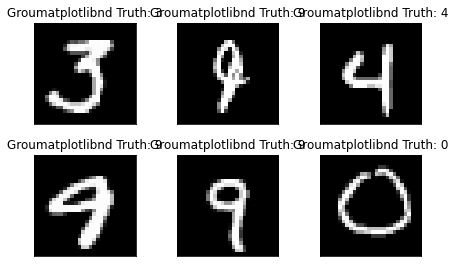

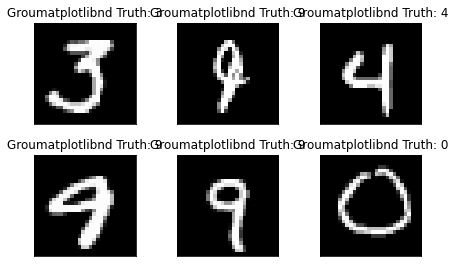

In [27]:


fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Groumatplotlibnd Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [28]:
%load_ext StateCaptureMagic

The StateCaptureMagic extension is already loaded. To reload it, use:
  %reload_ext StateCaptureMagic


In [29]:
%export_states

{'accessed_files': ['',
  'files/MNIST/raw/train-images-idx3-ubyte',
  '/root/.cache/pip/http/7/2/c/7/f/72c7f672549e9e8899a32c5c7920eabcef33f59737c6baf7b2958915',
  '/root/.cache/matplotlib/fontlist-v330.json.matplotlib-lock',
  '/root/.cache/pip/http/9/1/c/e/7/91ce7207f0e2688c725f5948ca7d56a6dfd1afa303f1db238eaf6879',
  '/root/.cache/pip/http/3/f/3/7/3/3f373ddaad43836e86af10debf9739bb851550ff24762413008934b8',
  '/root/.cache/pip/http/7/2/8/a/2/728a2f33f382f4dacf08f6df77aad6f3d889f819ba4fa3efad5ec7e4',
  'files/MNIST/raw/train-labels-idx1-ubyte',
  '/root/.cache/pip/http/0/a/0/c/c/0a0cc49621055f21b562bc6121a86f77c4076e42d03685d0b865c405',
  '/root/.cache/pip/http/f/5/4/8/8/f5488e4b9d9e12795b3ae821fc5d4edda1a99f24a19fa19ab7f92883',
  'files/MNIST/raw/t10k-images-idx3-ubyte',
  '/root/.cache/pip/http/f/b/1/1/0/fb11009f9dfa202bcbd12eaa8936ab23a342938042e1974968ac1778',
  '/root/.cache/pip/http/6/4/c/f/c/64cfc03e83f9fad4049b1d2a1d785c9273270a4ab9788b538f5054e3',
  '/root/.cache/pip/http/b